Spectroscopic data reduction in six simple steps. The steps performed in this notebook are shown in **bold.**

Step 1: Trim and subtract bias from all the data.

Step 2: Flatfield the data.

Step 3: Construct a comparison lamp image from separate He and Ne lamps.

Step 4: Fit a wavelength solution to the center of the lamp composite. 

Step 5: Extract the 1-D spectrum and its wavelength solution.

Step 6: Apply a relative flux calibration.

**$\rightarrow$ now you are ready to do a bit of analysis.**

Piece of cake. 

In [1]:
# start by importing the essentials 
import numpy as np 
from matplotlib import pyplot as plt 

from astropy import units as u
from astropy.io import fits
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.models import Gaussian1D, Linear1D
from astropy.modeling.fitting import LinearLSQFitter
from astropy.modeling.polynomial import Polynomial1D
from astropy.io import ascii
from astropy.table import Table

from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.analysis import line_flux, centroid, equivalent_width
from specutils.manipulation import box_smooth, gaussian_smooth, trapezoid_smooth, median_smooth


# (0) Read in the data

### Calibrated data: 

In [2]:
spec = np.load('/reduced/betacmi_spec.npy') * u.erg / u.s / u.cm**2
wave = np.load('/reduced/wave_sol.npy') * u.AA

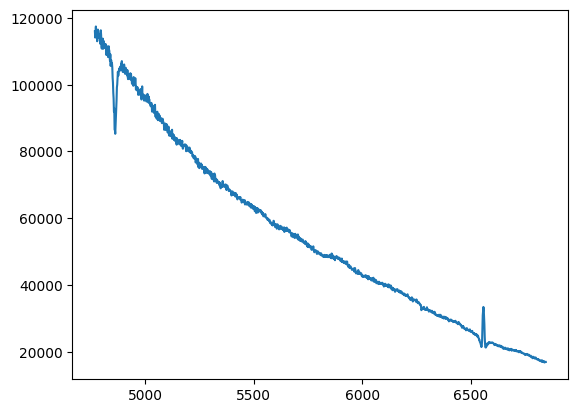

In [3]:
plt.plot(wave, spec)

# (8) Do some analysis 

Explore the 'specutils' package which has a lot of tools to help you analyze spectra. First, we'll load our data into a spectrum object. 


In [4]:
spec = Spectrum1D(flux=spec, spectral_axis=wave)

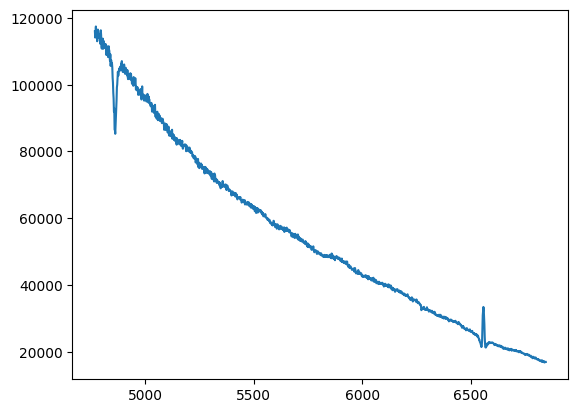

In [5]:
plt.plot(spec.spectral_axis, spec.flux)

Now we can try a bunch of analysis tools. For example, find a line centroid. 

In [6]:
centroid(spec, SpectralRegion(6362*u.AA, 6762*u.AA))

<Quantity 6545.08514733 Angstrom>

Measure the line flux

In [7]:
line_flux(spec, SpectralRegion(6362*u.AA, 6762*u.AA))

<Quantity 9786516.25560847 Angstrom erg / (s cm2)>

Measure the equivalent width

In [8]:
equivalent_width(spec, regions=SpectralRegion(4800*u.AA, 5000*u.AA)) 

<Quantity -20502423.20887127 Angstrom>

Try different kinds of smoothing... 

In [9]:
spec_bsmooth = box_smooth(spec, width=3)
spec_gsmooth = gaussian_smooth(spec, stddev=3)
spec_tsmooth = trapezoid_smooth(spec, width=3)
spec_msmooth = median_smooth(spec, width=3)

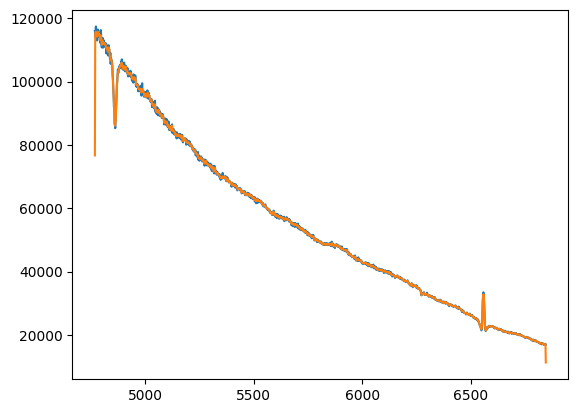

In [10]:
plt.plot(spec.spectral_axis, spec.flux)
plt.plot(spec_bsmooth.spectral_axis, spec_bsmooth.flux)

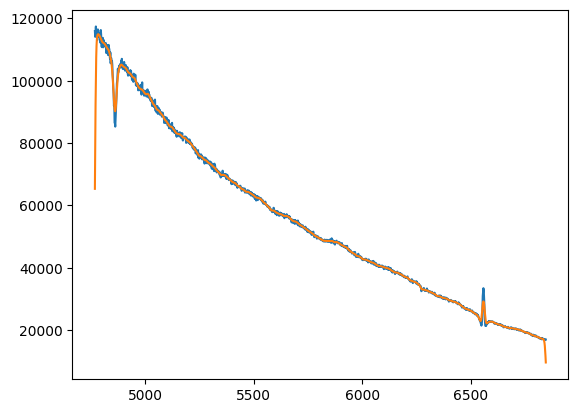

In [11]:
plt.plot(spec.spectral_axis, spec.flux)
plt.plot(spec_gsmooth.spectral_axis, spec_gsmooth.flux)

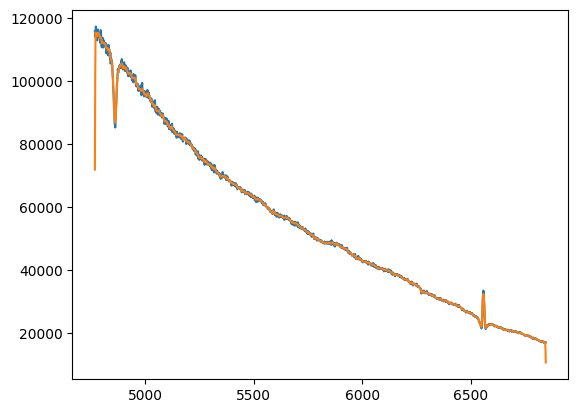

In [12]:
plt.plot(spec.spectral_axis, spec.flux)
plt.plot(spec_tsmooth.spectral_axis, spec_tsmooth.flux)


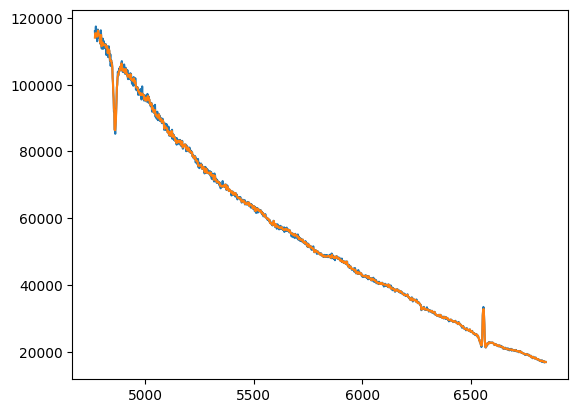

In [13]:
plt.plot(spec.spectral_axis, spec.flux)
plt.plot(spec_msmooth.spectral_axis, spec_msmooth.flux)
